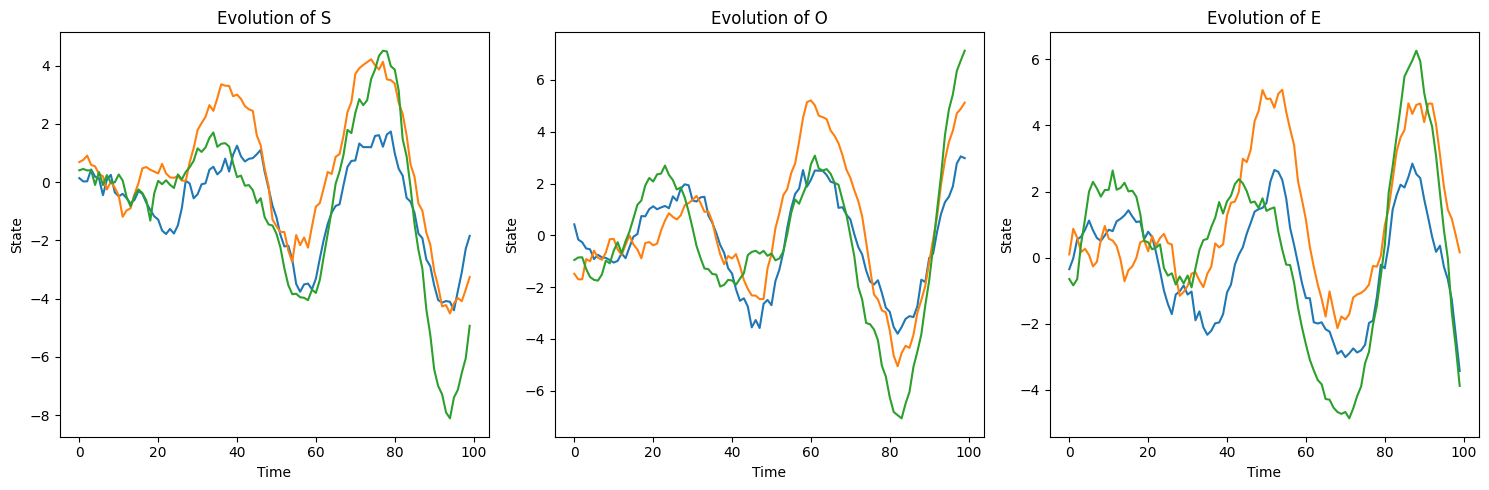

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 3  # Dimensionality of the state vectors
alpha, beta, gamma = 0.1, 0.2, 0.3  # Coupling coefficients
lambda_reg = 0.01  # Regularization parameter
T = 100  # Time steps
dt = 0.1  # Time resolution

# Initialize state vectors
S = np.random.randn(D)
O = np.random.randn(D)
E = np.random.randn(D)

# Placeholder for history
history_S = np.zeros((T, D))
history_O = np.zeros((T, D))
history_E = np.zeros((T, D))

# Define coupling functions
def f_SO(S, O):
    return alpha * (S - O)

def f_OE(O, E):
    return beta * (O - E)

def f_ES(E, S):
    return gamma * (E - S)

# Define free energy function and its gradient
def free_energy(S, O, E):
    return 0.5 * np.sum((S - O)**2 + (O - E)**2 + (E - S)**2)

def grad_free_energy(S, O, E):
    grad_S = S - O + E - S
    grad_O = O - E + S - O
    grad_E = E - S + O - E
    return grad_S, grad_O, grad_E

# Simulation loop
for t in range(T):
    # Record the history
    history_S[t] = S
    history_O[t] = O
    history_E[t] = E
    
    # Compute gradients of the free energy
    grad_S, grad_O, grad_E = grad_free_energy(S, O, E)
    
    # Add noise
    eta_S = np.random.randn(D)
    eta_O = np.random.randn(D)
    eta_E = np.random.randn(D)
    
    # Update equations
    S = S - dt * grad_S + np.sqrt(dt) * eta_S
    O = O - dt * grad_O + np.sqrt(dt) * eta_O
    E = E - dt * grad_E + np.sqrt(dt) * eta_E

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Evolution of S')
plt.plot(history_S)
plt.xlabel('Time')
plt.ylabel('State')

plt.subplot(1, 3, 2)
plt.title('Evolution of O')
plt.plot(history_O)
plt.xlabel('Time')
plt.ylabel('State')

plt.subplot(1, 3, 3)
plt.title('Evolution of E')
plt.plot(history_E)
plt.xlabel('Time')
plt.ylabel('State')

plt.tight_layout()
plt.show()


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import networkx as nx

# Load the MovieLens dataset (substitute with actual path if different)
# This is a small example, and in a real-world scenario, you might have to download the dataset.
# For this example, let's assume we have a DataFrame 'df' with columns 'userId', 'movieId', and 'rating'.

# Sample DataFrame representing the MovieLens dataset
data = {
    'userId': [1, 1, 2, 2, 3, 3, 4, 4],
    'movieId': [101, 102, 101, 103, 102, 103, 101, 104],
    'rating': [5, 4, 4, 3, 2, 4, 5, 1]
}
df = pd.DataFrame(data)

# Display the DataFrame
df


,userId,movieId,rating
0,1,101,5
1,1,102,4
2,2,101,4
3,2,103,3
4,3,102,2
5,3,103,4
6,4,101,5
7,4,104,1


In [3]:
# Create an empty bipartite graph
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
B.add_nodes_from(df['userId'].unique(), bipartite=0, label='user')
B.add_nodes_from(df['movieId'].unique(), bipartite=1, label='movie')

# Add edges only between nodes of opposite node sets
for _, row in df.iterrows():
    B.add_edge(row['userId'], row['movieId'], weight=row['rating'])

# Check if the graph is connected
nx.is_connected(B)


True

In [5]:
# Separate the nodes by their 'bipartite' attribute
user_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
movie_nodes = set(B) - user_nodes

# Generate the user and movie projections
user_projection = nx.bipartite.projected_graph(B, user_nodes)
movie_projection = nx.bipartite.projected_graph(B, movie_nodes)

# Display some basic information about the projections
print(f"User Projection: {len(user_projection.nodes())} nodes, {len(user_projection.edges())} edges")
print(f"Movie Projection: {len(movie_projection.nodes())} nodes, {len(movie_projection.edges())} edges")


User Projection: 4 nodes, 5 edges
Movie Projection: 4 nodes, 4 edges


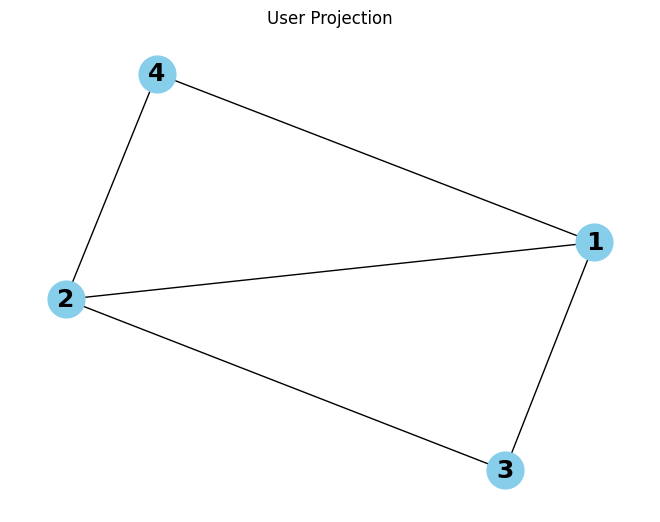

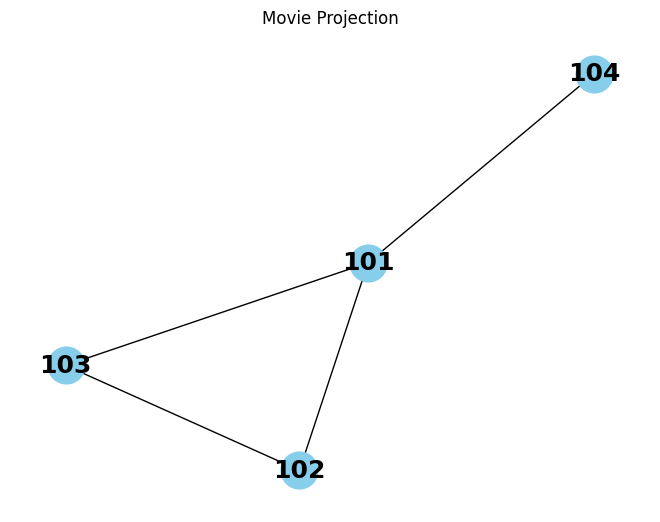

In [6]:
# Importing required libraries for visualization
import matplotlib.pyplot as plt

# Function to draw the network
def draw_network(G, title):
    pos = nx.spring_layout(G, seed=42)
    labels = {n: n for n in G.nodes()}
    nx.draw(G, pos, labels=labels, with_labels=True, node_color='skyblue', font_weight='bold', node_size=700, font_size=18)
    plt.title(title)
    plt.show()

# Draw the user and movie projections
draw_network(user_projection, "User Projection")
draw_network(movie_projection, "Movie Projection")


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample data
# For demonstration purposes, let's assume we have already prepared a feature matrix X and target vector y
# X would contain features extracted from the movie dataset (e.g., genres, ratings, etc.)
# y would contain labels indicating whether a user would like the movie (1) or not (0)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.randint(2, size=1000)  # 1000 samples, binary labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.49

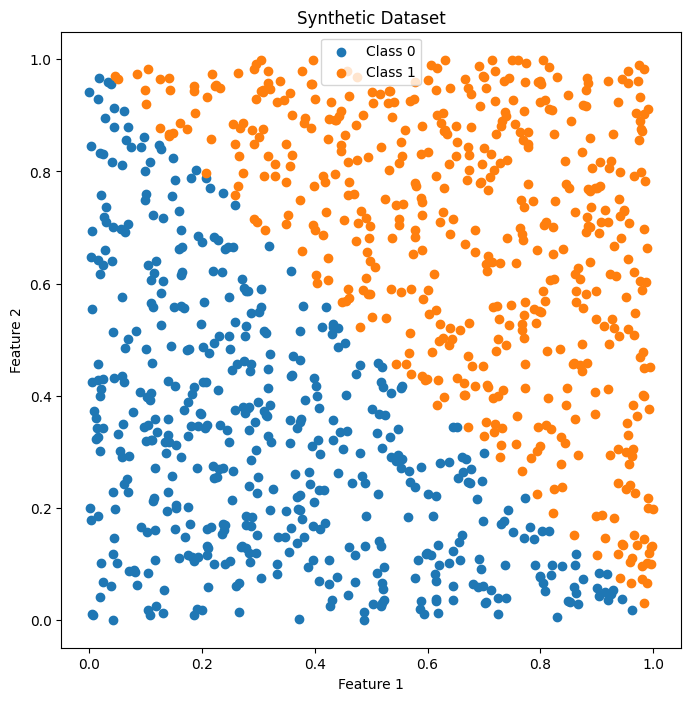

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(0)
X = np.random.rand(1000, 2)  # Features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Labels

# Plot the synthetic dataset
plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Synthetic Dataset')
plt.show()


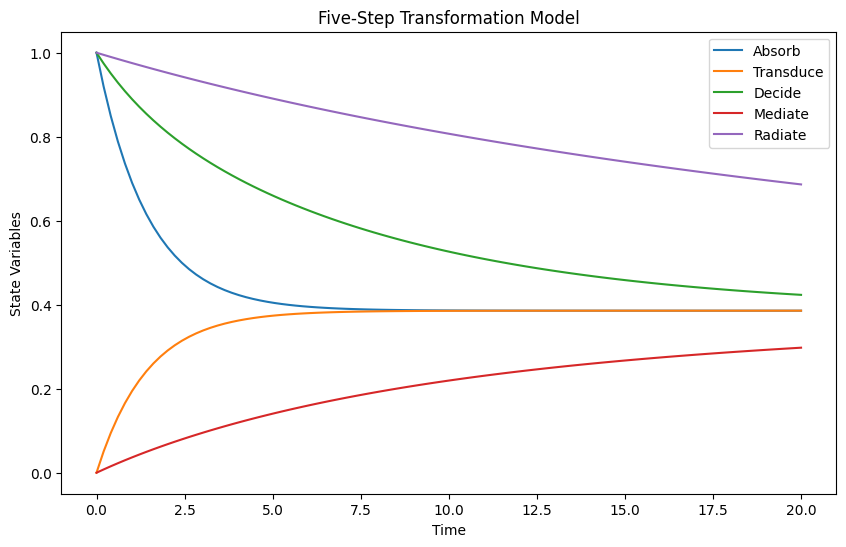

In [12]:
# Import necessary libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the 5-step transformation function
def five_step_transform(y, t, weights):
    absorb, transduce, decide, mediate, radiate = y
    
    # Initialize derivatives
    dydt = np.zeros(5)
    
    # Absorb: Incorporate external information
    dydt[0] = weights[0] * (transduce - absorb)
    
    # Transduce: Convert absorbed information for decision-making
    dydt[1] = weights[1] * (absorb - transduce)
    
    # Decide: Make a decision based on transduced information
    dydt[2] = weights[2] * (transduce - decide)
    
    # Mediate: Prepare the decision for external output
    dydt[3] = weights[3] * (decide - mediate)
    
    # Radiate: Emit the decision as an external action
    dydt[4] = weights[4] * (mediate - radiate)
    
    return dydt

# Initial conditions (absorb, transduce, decide, mediate, radiate)
y0 = [1, 0, 1, 0, 1]

# Time grid for integration
t = np.linspace(0, 20, 100)

# Weights for the transitions (random for demonstration)
weights = np.random.rand(5)

# Solve the differential equations
solution = odeint(five_step_transform, y0, t, args=(weights,))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, solution[:, 0], label='Absorb')
plt.plot(t, solution[:, 1], label='Transduce')
plt.plot(t, solution[:, 2], label='Decide')
plt.plot(t, solution[:, 3], label='Mediate')
plt.plot(t, solution[:, 4], label='Radiate')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.title('Five-Step Transformation Model')
plt.show()
